# Hito 1
Integrantes: - Matías Torres N.
             -Andrea Trigo D.
             -Hernán Cisternas G.
             -Daniel Sarazua Y.
             -Alvaro Garrido B.
             

## Motivación
El mundo del anime es una de las industrias de entretenimiento más grandes en todo el mundo. Su
popularidad ha crecido de forma estrepitosa en los últimos años, lo que ha llevado a que cada vez
haya más series de anime y usuarios que consumen estos. Además, hay una gran cantidad de datos
disponibles sobre los animes, desde información básica como los títulos y las fechas de lanzamiento,
hasta otras más específicas como las horas vistas y la información demográfica, entre otros.

El contexto general del tema de estudio se centra en el análisis de un conjunto de datos sobre animes
y los “otakus” (fanáticos de la cultura japonesa) que visualizan este contenido. Este conjunto de
datos es una muestra representativa de la comunidad otaku en Internet, y su objetivo es analizar la
demografía y las tendencias dentro de este grupo. Contiene información sobre los usuarios (género,
ubicación, fecha de nacimiento, etc.), sobre los animes (fecha de emisión, géneros, productores,
etc.) y las listas de animes que los usuarios han creado en MyAnimeList, incluyendo su estado de
visualización (plan para ver, completado, viendo, abandonado, etc.) y la puntuación que le han
dado en una escala del 1 al 10.

Estudiar estos datos es interesante por varias razones. Primeramente, para generar un análisis
demográfico y comprender la composición demográfica de la comunidad otaku, como la distribución
por género, edad y ubicación geográfica, lo que nos puede proporcionar información valiosa sobre
los intereses y preferencias de este grupo según atributos en común. Además, podemos ver las
tendencias y patrones de consumo, donde, al analizar las listas de animes y las calificaciones de
los usuarios, es posible identificar tendencias y patrones en el consumo de animes. Esto puede
ayudar a descubrir qué tipos de animes son más o menos populares, cuáles tienen una mayor tasa
de finalización y cuáles son más propensos a ser abandonados, lo que nos permite además, poder
investigar cómo influyen las características de un anime (género, productor, fecha de emisión, etc.)
en su popularidad y calificación, lo que nos puede proporcionar información útil para los creadores
de contenido y los estudios de producción de animes.

# Analisis exploratorio



## Estadisticas generales de cada tabla

Se realiza un analisis general de cada dataframe. Se calculan sus dimensiones, los tipos de los datos de cada columna y las estadisticas (promedio, moda, mediana, cuartiles) de las columnas de tipo numerico. Además se filtran las columnas que presentan una cantidad considerable de nulos.

In [74]:
import pandas as pd
import seaborn as sns
pd.set_option('display.max_columns', None)

In [2]:
anime = pd.read_csv('data/anime_cleaned.csv')
users = pd.read_csv('data/users_cleaned.csv')

### Data set Animelists

In [3]:
animelists = pd.read_csv('data/animelists_cleaned.csv')

In [4]:
animelists = animelists.sort_values(by='username')

In [5]:
# drop null values in username
animelists = animelists.dropna(subset=['username'])

In [6]:
# drop columns my_start_date and my_finish_date
animelists = animelists.drop(columns=['my_start_date', 'my_finish_date'])

In [7]:
# drop my_tags column because it is not needed
animelists = animelists.drop(columns=['my_tags'])

In [8]:
# drop column my_last_updated because it is not needed
animelists = animelists.drop(columns=['my_last_updated'])

In [9]:
animelists

,username,anime_id,my_watched_episodes,my_score,my_status,my_rewatching,my_rewatching_ep
6740075,----phoebelyn,949,6,0,2,0.0,0
6740009,----phoebelyn,57,0,0,3,0.0,0
6740010,----phoebelyn,93,0,0,3,0.0,0
6740011,----phoebelyn,121,0,0,3,0.0,0
6740012,----phoebelyn,135,75,0,2,0.0,0
...,...,...,...,...,...,...,...
6085244,zzzzz-chan,644,0,0,6,0.0,0
6085245,zzzzz-chan,740,43,7,2,0.0,0
6085246,zzzzz-chan,969,26,7,2,0.0,0
6085248,zzzzz-chan,1142,12,9,2,NaN,0


In [10]:
animelists.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31283787 entries, 6740075 to 6085121
Data columns (total 7 columns):
 #   Column               Dtype  
---  ------               -----  
 0   username             object 
 1   anime_id             int64  
 2   my_watched_episodes  int64  
 3   my_score             int64  
 4   my_status            int64  
 5   my_rewatching        float64
 6   my_rewatching_ep     int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 1.9+ GB


In [11]:
animelists.describe()

,anime_id,my_watched_episodes,my_score,my_status,my_rewatching,my_rewatching_ep
count,3.128379e+07,3.128379e+07,3.128379e+07,3.128379e+07,2.440557e+07,3.128379e+07
mean,1.170324e+04,1.289617e+01,4.652314e+00,3.008110e+00,7.903113e-04,1.833008e-01
std,1.134843e+04,3.733389e+01,3.931616e+00,1.730421e+00,2.810137e-02,1.009176e+03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.601000e+03,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00
50%,8.086000e+03,4.000000e+00,6.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00
75%,1.977500e+04,1.300000e+01,8.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00
max,3.789600e+04,9.999000e+03,1.000000e+01,5.500000e+01,1.000000e+00,5.644513e+06


###  Data set Anime

In [12]:
anime = anime.drop(columns=[
    'image_url', 'background', 'related', 'premiered', 'broadcast',
    'opening_theme', 'ending_theme', 'title_english', 'title_japanese', 'title_synonyms',
    'airing', 'aired_string', 'licensor', 'producer'
    ])

In [13]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6668 entries, 0 to 6667
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   anime_id         6668 non-null   int64  
 1   title            6668 non-null   object 
 2   type             6668 non-null   object 
 3   source           6668 non-null   object 
 4   episodes         6668 non-null   int64  
 5   status           6668 non-null   object 
 6   aired            6668 non-null   object 
 7   duration         6668 non-null   object 
 8   rating           6668 non-null   object 
 9   score            6668 non-null   float64
 10  scored_by        6668 non-null   int64  
 11  rank             6312 non-null   float64
 12  popularity       6668 non-null   int64  
 13  members          6668 non-null   int64  
 14  favorites        6668 non-null   int64  
 15  studio           6668 non-null   object 
 16  genre            6664 non-null   object 
 17  duration_min  

In [14]:
anime.describe()

,anime_id,episodes,score,scored_by,rank,popularity,members,favorites,duration_min,aired_from_year
count,6668.000000,6668.000000,6668.000000,6.668000e+03,6312.000000,6668.000000,6.668000e+03,6668.000000,6668.000000,6668.000000
mean,15064.977804,14.276395,6.848998,2.403501e+04,4327.645120,4479.515897,4.749037e+04,670.365627,28.442167,2006.915267
std,13161.364001,40.906929,0.927448,6.112103e+04,3170.699074,3453.338080,1.051211e+05,3823.072834,25.365980,10.381425
min,1.000000,0.000000,0.000000,0.000000e+00,1.000000,1.000000,1.800000e+01,0.000000,0.000000,1942.000000
25%,2592.000000,1.000000,6.350000,6.812500e+02,1710.750000,1691.750000,2.222750e+03,3.000000,17.000000,2003.000000
50%,10401.500000,6.000000,6.930000,3.966000e+03,3754.500000,3629.500000,1.033650e+04,21.000000,24.000000,2010.000000
75%,30301.250000,13.000000,7.460000,1.976075e+04,6338.500000,6630.250000,4.336000e+04,142.000000,27.000000,2015.000000
max,37896.000000,1818.000000,9.520000,1.009477e+06,12856.000000,14468.000000,1.456378e+06,106895.000000,163.000000,2018.000000


### Data set Users

In [15]:
users = users.drop(columns=["location", "access_rank"])

In [16]:
# generate new column age based on birth_date
users['age'] = 2018 - users['birth_date'].str[:4].astype(int)

In [17]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108711 entries, 0 to 108710
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   username                  108710 non-null  object 
 1   user_id                   108711 non-null  int64  
 2   user_watching             108711 non-null  int64  
 3   user_completed            108711 non-null  int64  
 4   user_onhold               108711 non-null  int64  
 5   user_dropped              108711 non-null  int64  
 6   user_plantowatch          108711 non-null  int64  
 7   user_days_spent_watching  108711 non-null  float64
 8   gender                    108711 non-null  object 
 9   birth_date                108711 non-null  object 
 10  join_date                 108711 non-null  object 
 11  last_online               108711 non-null  object 
 12  stats_mean_score          108711 non-null  float64
 13  stats_rewatched           108711 non-null  f

In [18]:
users.describe()

,user_id,user_watching,user_completed,user_onhold,user_dropped,user_plantowatch,user_days_spent_watching,stats_mean_score,stats_rewatched,stats_episodes,age
count,1.087110e+05,108711.000000,108711.000000,108711.000000,108711.000000,108711.000000,108711.000000,108711.000000,108711.000000,108711.000000,108711.000000
mean,1.817687e+06,14.767503,196.458178,11.388167,11.733716,75.578589,61.913873,7.747612,14.197993,3779.871255,25.125820
std,1.998269e+06,32.746591,244.945751,30.830825,30.978991,178.653664,59.211762,1.451368,55.376799,3678.336729,4.632399
min,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.500694,0.000000,0.000000,7.000000,10.000000
25%,1.994345e+05,3.000000,50.000000,0.000000,0.000000,6.000000,21.066319,7.330000,0.000000,1269.500000,22.000000
50%,5.675030e+05,7.000000,123.000000,4.000000,3.000000,27.000000,46.190278,7.890000,1.000000,2797.000000,25.000000
75%,3.477036e+06,16.000000,254.000000,12.000000,12.000000,81.000000,84.461806,8.460000,10.000000,5135.000000,28.000000
max,7.251737e+06,2934.000000,5479.000000,2562.000000,2457.000000,12051.000000,952.654595,10.000000,9404.000000,62347.000000,49.000000


# Análisis más profundo

Se realizan consultas sobre las tablas de las cuales derivarán las preguntas a realizar en los siguientes hitos. 

### Consulta 1:  Top 20 animes mejor y peor evaluados

Se crean dos grafico que muestran los 20 animes mejor y peor evaluados. Se filtran aquellos animes que han sido evaluados menos de 24000 veces, siendo este ultimo valor una aproximacion del promedio de la cantidad de evaluaciones que reciben los animes en este dataset.

In [19]:
animelists2 = animelists[['username', 'anime_id', 'my_watched_episodes']]

Text(0, 0.5, 'Puntaje')

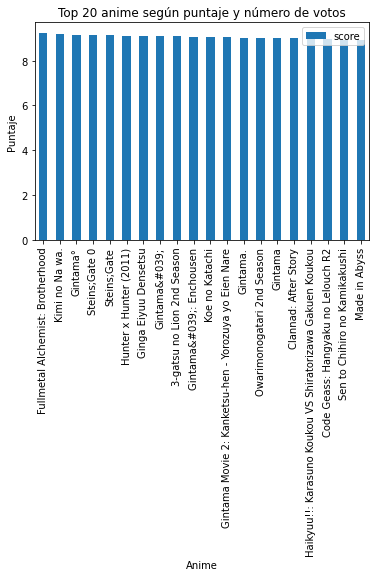

In [20]:

import matplotlib.pyplot as plt

anime1 = anime[['title','score','scored_by']]
anime1 = anime1[anime1['scored_by'] > 24000] 
anime_top_asc = anime1.sort_values('score', ascending=False)
anime_top_asc = anime_top_asc.head(20)

#Grafico  
anime_top_asc.plot(x='title', y='score', kind='bar')
plt.title('Top 20 anime según puntaje y número de votos')
plt.xlabel('Anime')
plt.ylabel('Puntaje')

#Pregunta: 

#¿Es posible predecir las calificaciones de un anime en función de 
# características como género, productor y fecha de emisión?


Text(0, 0.5, 'Puntaje')

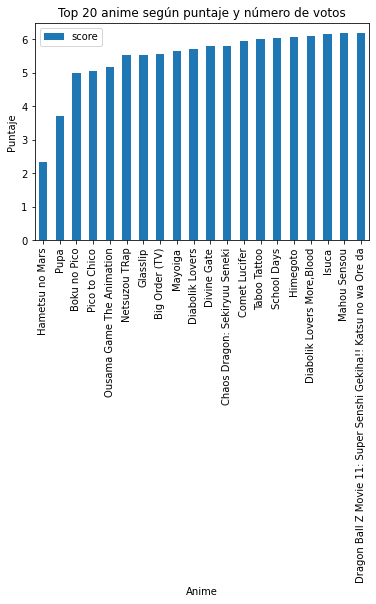

In [21]:
anime_top_des = anime1.sort_values('score', ascending=True)
anime_top_des = anime_top_des.head(20)

#Grafico  
anime_top_des.plot(x='title', y='score', kind='bar')
plt.title('Top 20 anime según puntaje y número de votos')
plt.xlabel('Anime')
plt.ylabel('Puntaje')

#Pregunta: 

#¿Es posible predecir las calificaciones de un anime en función de 
# características como género, productor y fecha de emisión?
ola

# Consulta 2: Dispersión de las edades de usuarios en un género de anime específico

Se filtra la lista de animes primero por el género ```Shounen``` y luego por ```Shoujo```, para ver las características predominantes de los usuarios que consumen estos tipos de anime.

In [38]:
anime_shounen = anime.dropna(subset=['genre'])

In [39]:
anime_shounen = anime_shounen[anime_shounen['genre'].str.contains('Shounen')]

In [40]:
animelists2 = animelists[['username', 'anime_id', 'my_watched_episodes']]

In [41]:
animelists2 = animelists2.merge(anime_shounen, on='anime_id', how='inner')

In [42]:
animelists2 = animelists2.merge(users, on='username', how='inner')

In [43]:
animelists2 = animelists2[animelists2['my_watched_episodes'] > 0]

Text(0, 0.5, 'Cantidad de usuarios')

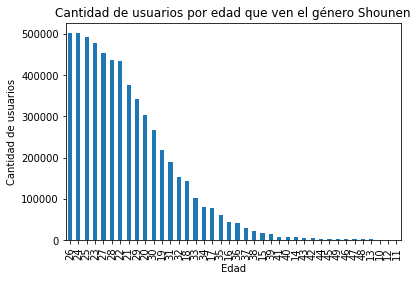

In [44]:
# grafico de cantidad de usuarios por edad que ven el genero shounen
animelists2['age'].value_counts().plot(kind='bar')

plt.title('Cantidad de usuarios por edad que ven el género Shounen')
plt.xlabel('Edad')
plt.ylabel('Cantidad de usuarios')

Text(0, 0.5, 'Cantidad de usuarios')

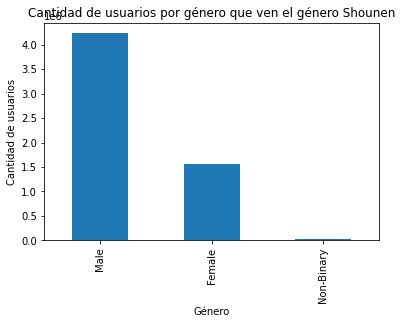

In [45]:
# grafico de cantidad de usuarios por genero que ven el genero shounen
animelists2['gender'].value_counts().plot(kind='bar')

plt.title('Cantidad de usuarios por género que ven el género Shounen')
plt.xlabel('Género')
plt.ylabel('Cantidad de usuarios')

In [47]:
anime_shoujo = anime.dropna(subset=['genre'])

In [48]:
anime_shoujo = anime_shoujo[anime_shoujo['genre'].str.contains('Shoujo')]

In [49]:
animelists2 = animelists[['username', 'anime_id', 'my_watched_episodes']]

In [50]:
animelists2 = animelists2.merge(anime_shoujo, on='anime_id', how='inner')

In [51]:
animelists2 = animelists2.merge(users, on='username', how='inner')

In [52]:
animelists2 = animelists2[animelists2['my_watched_episodes'] > 0]

Text(0, 0.5, 'Cantidad de usuarios')

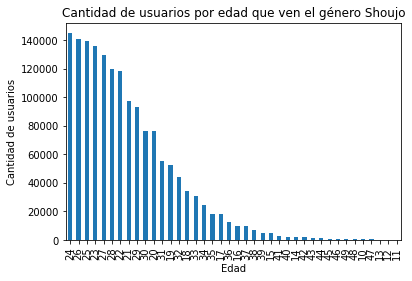

In [53]:
# grafico de cantidad de usuarios por edad que ven el genero Shoujo
animelists2['age'].value_counts().plot(kind='bar')

plt.title('Cantidad de usuarios por edad que ven el género Shoujo')
plt.xlabel('Edad')
plt.ylabel('Cantidad de usuarios')

Text(0, 0.5, 'Cantidad de usuarios')

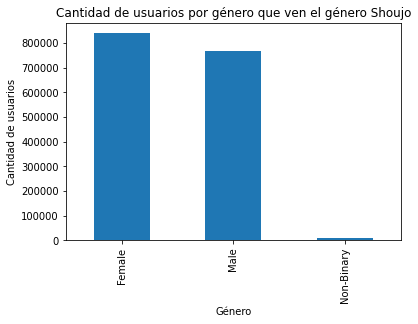

In [54]:
# grafico de cantidad de usuarios por genero que ven el genero Shoujo
animelists2['gender'].value_counts().plot(kind='bar')

plt.title('Cantidad de usuarios por género que ven el género Shoujo')
plt.xlabel('Género')
plt.ylabel('Cantidad de usuarios')

# Consulta 3: Más droppeados

In [77]:
anime_dropped = animelists[['anime_id', 'my_status']] #proyeccion sobre datos significativos

anime_dropped = anime_dropped[anime_dropped['my_status'] == 4] #se dejan solo los dropeados

count_dropped = anime_dropped['anime_id'].value_counts(dropna=True, sort=True) #se cuentan las repeticiones del id

count_dropped = count_dropped.rename_axis('anime_id').to_frame('counts') #se convierte en un dataframe

anime_names = anime[['title','anime_id','score','genre']]

count_dropped = count_dropped.merge(anime_names, on='anime_id', how='inner') #se obtienen los nombres a partir del id

count_dropped.head(20) #primeros 20

,anime_id,counts,title,score,genre
0,269,11807,Bleach,7.90,"Action, Adventure, Comedy, Super Power, Supern..."
1,1735,9424,Naruto: Shippuuden,8.18,"Action, Adventure, Comedy, Super Power, Martia..."
2,20,7247,Naruto,7.88,"Action, Adventure, Comedy, Super Power, Martia..."
3,21,6696,One Piece,8.54,"Action, Adventure, Comedy, Super Power, Drama,..."
4,6702,6094,Fairy Tail,8.08,"Action, Adventure, Comedy, Magic, Fantasy, Sho..."
5,527,4120,Pokemon,7.42,"Action, Adventure, Comedy, Kids, Fantasy"
6,249,3748,InuYasha,7.90,"Action, Adventure, Comedy, Historical, Demons,..."
7,1887,3371,Lucky☆Star,7.83,"Slice of Life, Comedy, Parody, School"
8,1482,3199,D.Gray-man,8.16,"Action, Adventure, Comedy, Super Power, Demons..."
9,3588,3127,Soul Eater,8.03,"Action, Fantasy, Comedy, Supernatural, Shounen"


(0.0, 150.0)

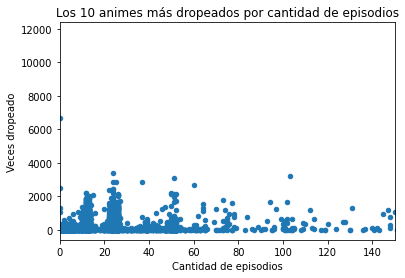

In [78]:
count_dropped = count_dropped.merge(anime, on='anime_id', how='inner')

# grafica los 10 animes más dropeados por cantidad de episodios
# en un grafico de puntos in range 0-500
count_dropped.plot(x='episodes', y='counts', kind='scatter')

plt.title('Los 10 animes más dropeados por cantidad de episodios')

plt.xlabel('Cantidad de episodios')

plt.ylabel('Veces dropeado')

plt.xlim(0, 150)

<AxesSubplot:>

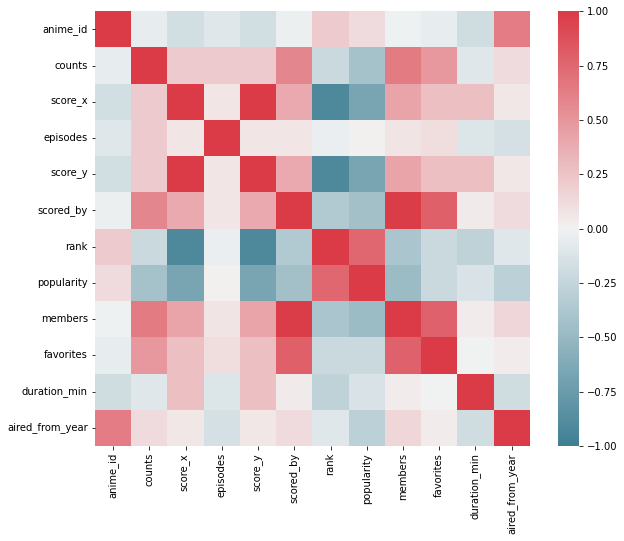

In [75]:
f, ax = plt.subplots(figsize=(10, 8))
corr = count_dropped.corr()
sns.heatmap(corr,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)

# Consulta 4: Estudios más populares en el top 100

Text(0, 0.5, 'Cantidad de animes')

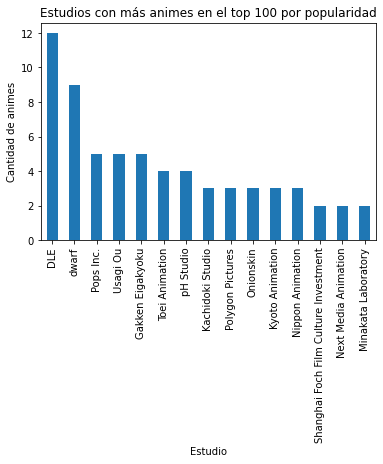

In [91]:
# grafica los estudios de los 100 animes más populares

anime = anime.sort_values('popularity', ascending=False)
anime_top100 = anime.head(100)

anime_top100 = anime_top100['studio'].value_counts()

anime_top100[anime_top100 > 1].plot(kind='bar')

plt.title('Estudios con más animes en el top 100 por popularidad')

plt.xlabel('Estudio')

plt.ylabel('Cantidad de animes')


# Consulta 5: top animes con más capitulos

In [92]:
anime2 = anime[["title", "episodes", ]]
anime2 = anime2.sort_values('episodes', ascending=False)
anime2 = anime2.head(20)

Text(0, 0.5, 'Num episodios')

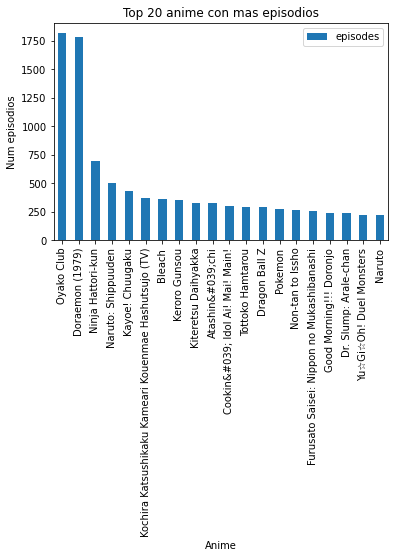

In [94]:
anime2.plot(x='title', y='episodes', kind='bar')
plt.title('Top 20 anime con mas episodios')
plt.xlabel('Anime')
plt.ylabel('Num episodios')